<a href="https://colab.research.google.com/github/phanich004/Disaster_Tweet_Detection/blob/main/Disaster_Tweets_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv('/content/train.csv')


In [ ]:
df.head() #Exploring the shape of our dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
pd.set_option('display.max_colwidth', None)

# Selecting samples to explore examples of both disastrous and non disastrous tweets
samples_label_1 = df[df['target'] == 1].sample(n=5, random_state=3)
samples_label_0 = df[df['target'] == 0].sample(n=5, random_state=3)
samples = pd.concat([samples_label_1, samples_label_0])

# Converting DataFrame to a list of lists for tabulate
table_data = samples[['text', 'target']].values.tolist()
table_headers = ['Text', 'Target']
print(tabulate(table_data, headers=table_headers, tablefmt='fancy_grid'))

╒══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╕
│ Text                                                                                                                                         │   Target │
╞══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════╡
│ News Update Huge cliff landslide on road in China - Watch the moment a cliff collapses as huge chunks of rock fall... http://t.co/gaBd0cjmAG │        1 │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──────────┤
│ When you go to a concert and someone screams in your ear... Does it look like I wanna loose my hearing anytime soon???                       │        1 │
├───────────────────────────────────────────────────────────────

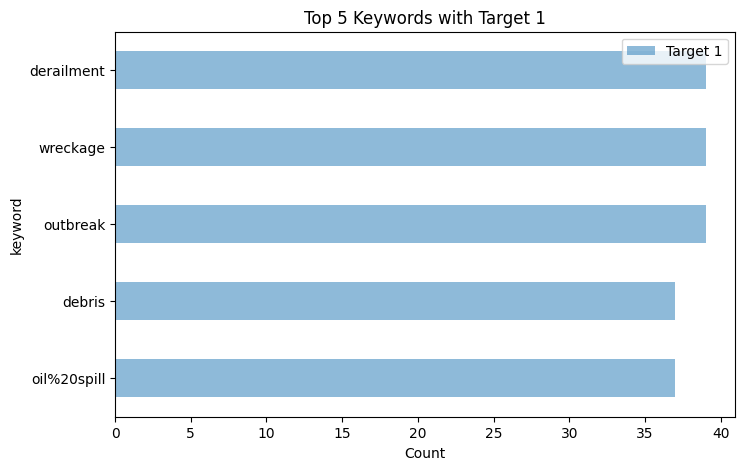

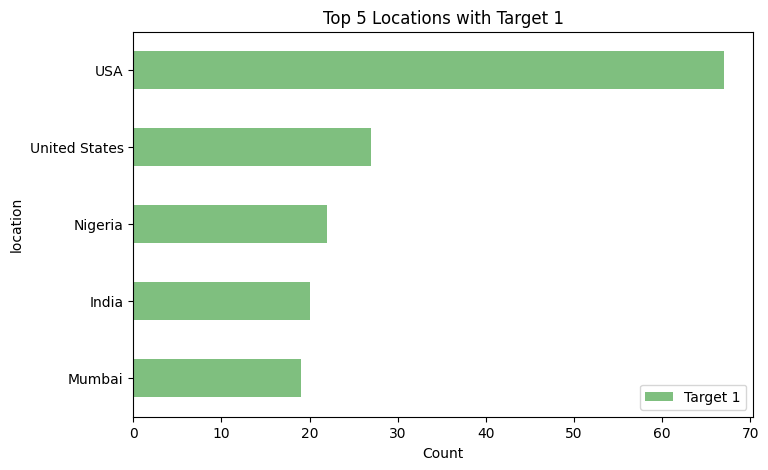

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Counting the occurrences of keywords and locations for both target 0 and target 1
keyword_counts_target1 = df[df['target'] == 1]['keyword'].value_counts().head(5)
location_counts_target1 = df[df['target'] == 1]['location'].value_counts().head(5)


# Plotting keywords for target 1
plt.figure(figsize=(8, 5))
keyword_counts_target1.plot(kind='barh', alpha=0.5, label='Target 1')
plt.xlabel('Count')
plt.title('Top 5 Keywords with Target 1')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


# Plotting locations for target 1
plt.figure(figsize=(8, 5))
location_counts_target1.plot(kind='barh', color='green', alpha=0.5, label='Target 1')
plt.xlabel('Count')
plt.title('Top 5 Locations with Target 1')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


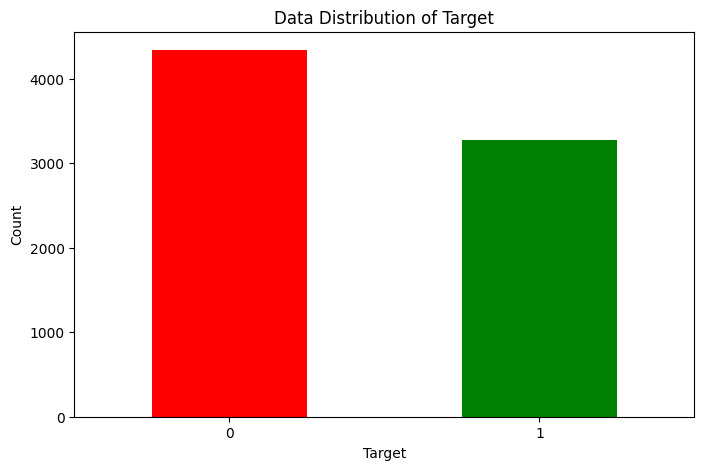

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Counting the occurrences of each target value
target_counts = df['target'].value_counts()

# Plotting the data distribution of target
plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Data Distribution of Target')
plt.xticks(rotation=0)
plt.show()


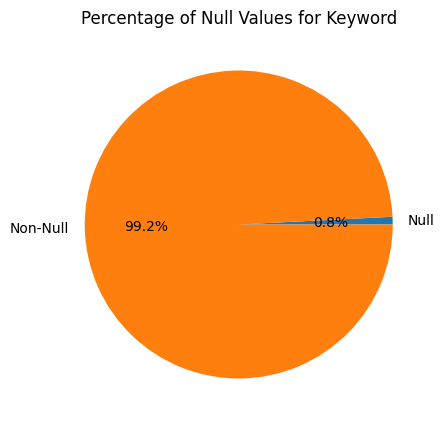

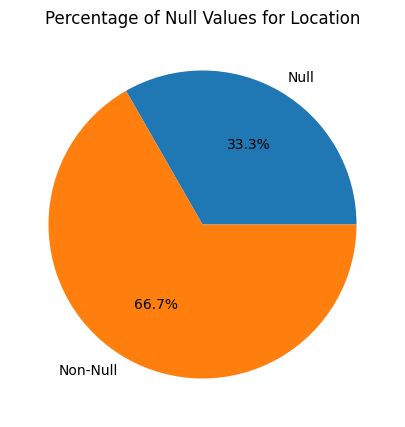

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculating the percentage of null values for 'keyword' and 'location'
keyword_null_percentage = df['keyword'].isnull().mean() * 100
location_null_percentage = df['location'].isnull().mean() * 100


plt.figure(figsize=(8, 5))
plt.pie([keyword_null_percentage, 100 - keyword_null_percentage], labels=['Null', 'Non-Null'], autopct='%1.1f%%')
plt.title('Percentage of Null Values for Keyword')
plt.show()

plt.figure(figsize=(8, 5))
plt.pie([location_null_percentage, 100 - location_null_percentage], labels=['Null', 'Non-Null'], autopct='%1.1f%%')
plt.title('Percentage of Null Values for Location')
plt.show()


In [ ]:
df.isnull().sum() #Priting the numvber of null values for possible data manipulation

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<Figure size 1000x600 with 0 Axes>

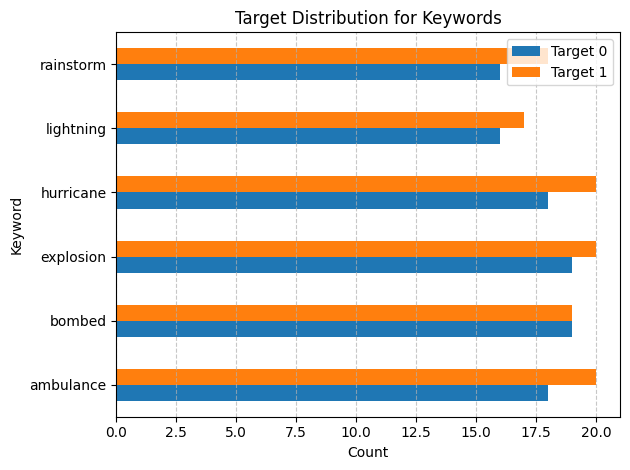

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating a list of disaster related keywords to see the distribution of target
keywords_of_interest = ['hurricane', 'rainstorm', 'ambulance', 'lightning', 'explosion', 'bombed']
filtered_df = df[df['keyword'].isin(keywords_of_interest)]

# Counting the occurrences of target 0 and target 1 for each keyword
target_distribution = filtered_df.groupby(['keyword', 'target']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
target_distribution.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Target Distribution for Keywords')
plt.legend(['Target 0', 'Target 1'], loc='upper right')  # Adjusted legend position
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(columns = ['id','keyword','location'])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Initializing the WordNetLemmatizer to perform lemmatization
lemmatizer = WordNetLemmatizer()

# Load the English stopwords from the NLTK corpus
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphanumeric characters, digits, and link extenders using regular expressions
    text = re.sub(r"[\W\d_]+|http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|\.com", " ", text)
    text = text.lower() # Convert the text to lowercase.
    words = text.split() #Split the text into individual words.
    processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Lemmatizing each word which isnt a stop word effectively removing stop words

    # Join the processed words back into a single string
    processed_text = ' '.join(processed_words)

    return processed_text



In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Convert DataFrame to a list of lists for tabulate
table_data = df[['text', 'cleaned_text']].head(7).values.tolist()  # Keep only the top 7 results

# Remove the third row (index 2) from table_data
table_data.pop(2)

# Display the table using tabulate
table_headers = ['Text', 'Cleaned Text']
print(tabulate(table_data, headers=table_headers, tablefmt='fancy_grid'))

╒════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════╕
│ Text                                                                                                           │ Cleaned Text                                                                          │
╞════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════╡
│ Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                          │ deed reason earthquake may allah forgive u                                            │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────────────

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from collections import Counter
from itertools import chain, combinations


In [ ]:
def generate_ngrams(text, n):
    #Generates n-grams from the given text.
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]


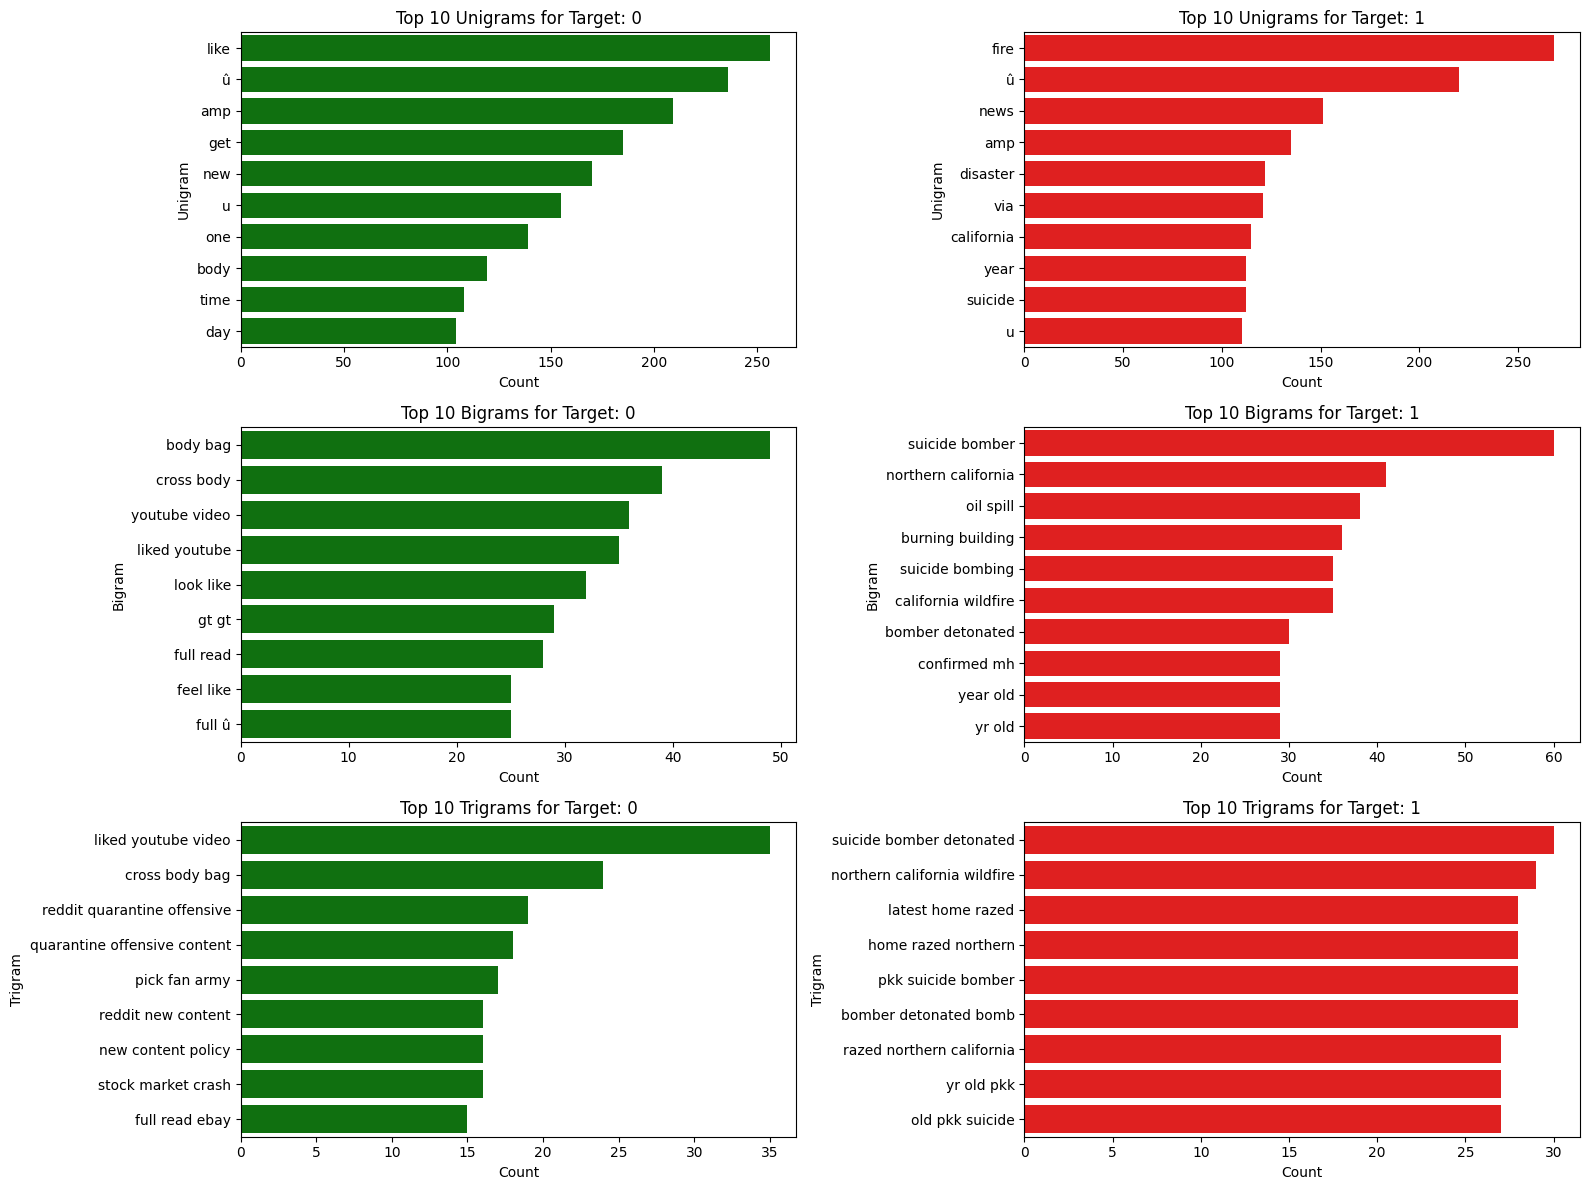

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

#For unigrams
for i, target in enumerate([0, 1]):
    # Generating unigrams for the current target class
    unigrams = df[df['target'] == target]['cleaned_text'].apply(generate_ngrams, args=(1,)).explode().tolist()
    # fetching the top 10 most common unigrams and their counts
    unigram_counts = dict(Counter(unigrams).most_common(10))
    # Creating a horizontal bar plot
    sns.barplot(x=list(unigram_counts.values()), y=list(unigram_counts.keys()), orient='h', ax=axes[0, i], color='green' if target == 0 else 'red')
    axes[0, i].set_title(f"Top 10 Unigrams for Target: {target}")
    axes[0, i].set_xlabel("Count")
    axes[0, i].set_ylabel("Unigram")

# For Bigrams
for i, target in enumerate([0, 1]):
    bigrams = df[df['target'] == target]['cleaned_text'].apply(generate_ngrams, args=(2,)).explode().tolist()
    bigram_counts = dict(Counter(bigrams).most_common(10))
    sns.barplot(x=list(bigram_counts.values()), y=list(bigram_counts.keys()), orient='h', ax=axes[1, i], color='green' if target == 0 else 'red')
    axes[1, i].set_title(f"Top 10 Bigrams for Target: {target}")
    axes[1, i].set_xlabel("Count")
    axes[1, i].set_ylabel("Bigram")


#For trigrams
for i, target in enumerate([0, 1]):
    trigrams = df[df['target'] == target]['cleaned_text'].apply(generate_ngrams, args=(3,)).explode().tolist()
    trigram_counts = dict(Counter(trigrams).most_common(10))
    sns.barplot(x=list(trigram_counts.values()), y=list(trigram_counts.keys()), orient='h', ax=axes[2, i], color='green' if target == 0 else 'red')
    axes[2, i].set_title(f"Top 10 Trigrams for Target: {target}")
    axes[2, i].set_xlabel("Count")
    axes[2, i].set_ylabel("Trigram")


plt.tight_layout()
plt.show()


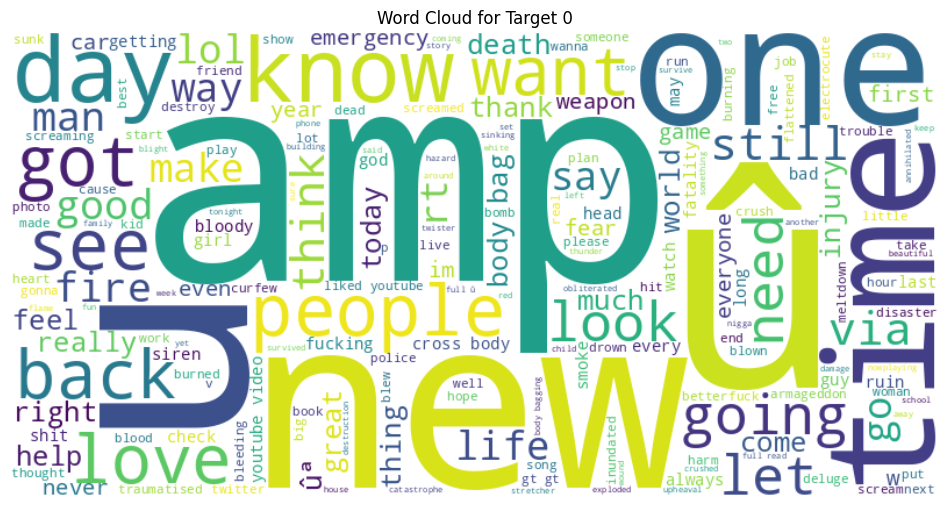

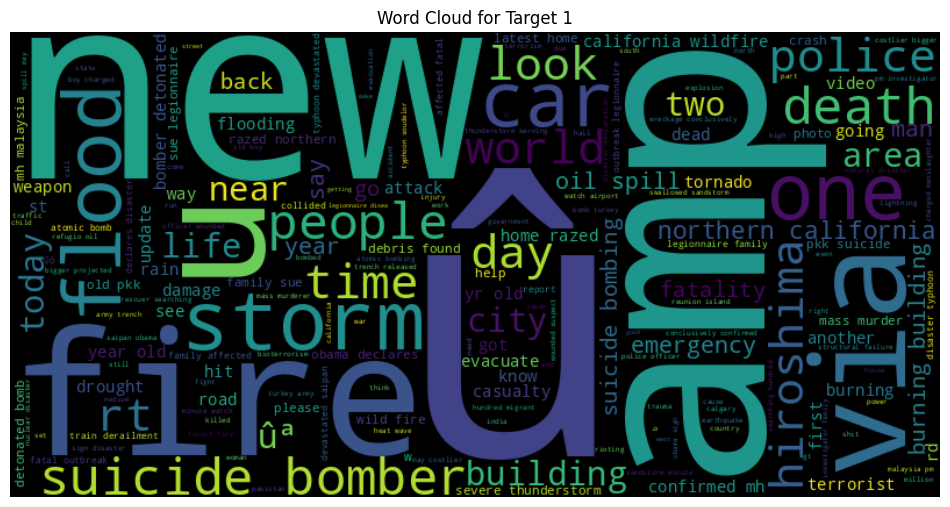

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Function to create a word cloud
def create_wordcloud(text, title, color='black'):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color=color, max_words=200, stopwords=stopwords, width=800, height=400)
    wc.generate(text)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Create word cloud for target 0
target_0_text = ' '.join(df[df['target'] == 0]['cleaned_text'])
create_wordcloud(target_0_text, 'Word Cloud for Target 0', 'white')

# Create word cloud for target 1
target_1_text = ' '.join(df[df['target'] == 1]['cleaned_text'])
create_wordcloud(target_1_text, 'Word Cloud for Target 1', 'black')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
# Applying TFIDF vectorization on the text to convert it to numeric vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)




In [ ]:
# Training the DecisionTreeClassifier model with gini criterion.
model = DecisionTreeClassifier(criterion='gini', splitter='best')
model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
report= classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       874
           1       0.70      0.68      0.69       649

    accuracy                           0.74      1523
   macro avg       0.74      0.73      0.73      1523
weighted avg       0.74      0.74      0.74      1523



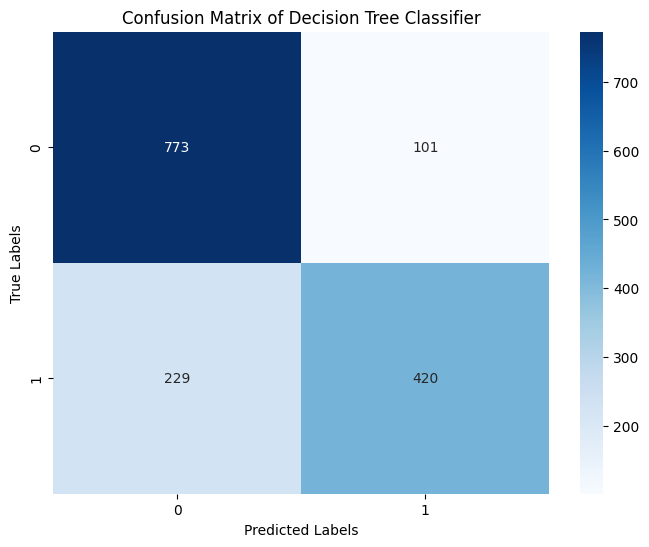

In [ ]:
# Creating a confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()


In [ ]:
# Training the GradientBoostingClassifier with log_loss
model = GradientBoostingClassifier(loss='log_loss')
model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
report= classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       874
           1       0.86      0.48      0.61       649

    accuracy                           0.74      1523
   macro avg       0.78      0.71      0.71      1523
weighted avg       0.77      0.74      0.73      1523



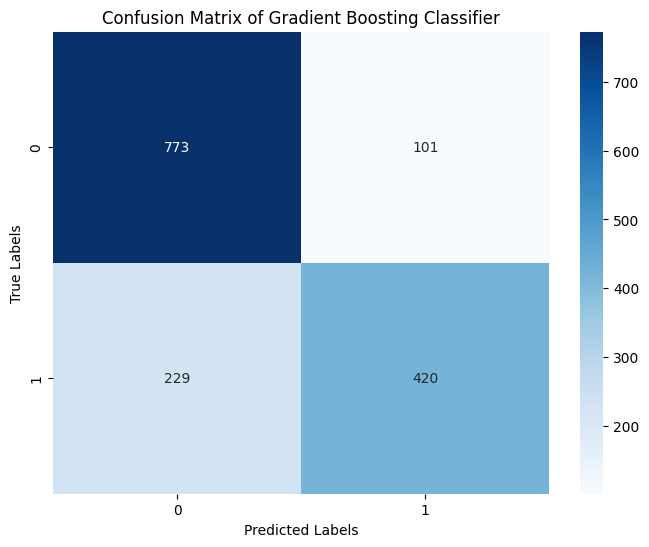

In [ ]:
# Creating a confusion matrix for GradientBoostingClassifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()


In [ ]:
# Train the logistic regression model
model =  LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
report= classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       874
           1       0.83      0.64      0.73       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523



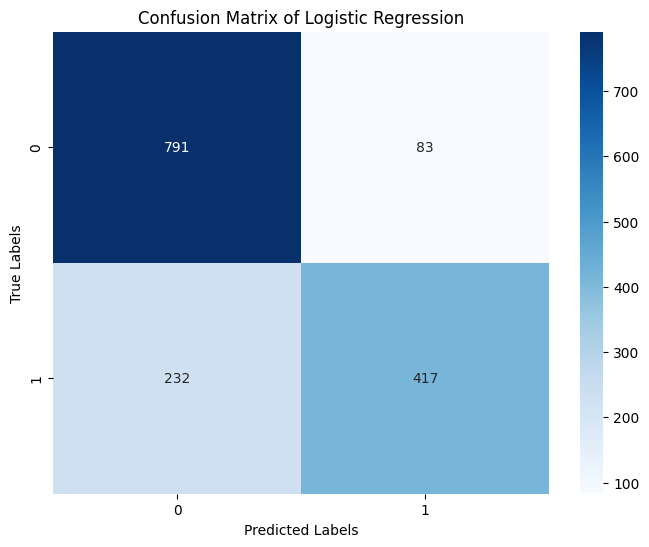

In [ ]:
# Creating a confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


In [ ]:
# Train the Support Vector Machine model with radial kernel
model = SVC(kernel='rbf', degree=3)
model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
report= classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       874
           1       0.86      0.63      0.73       649

    accuracy                           0.80      1523
   macro avg       0.82      0.78      0.78      1523
weighted avg       0.81      0.80      0.79      1523



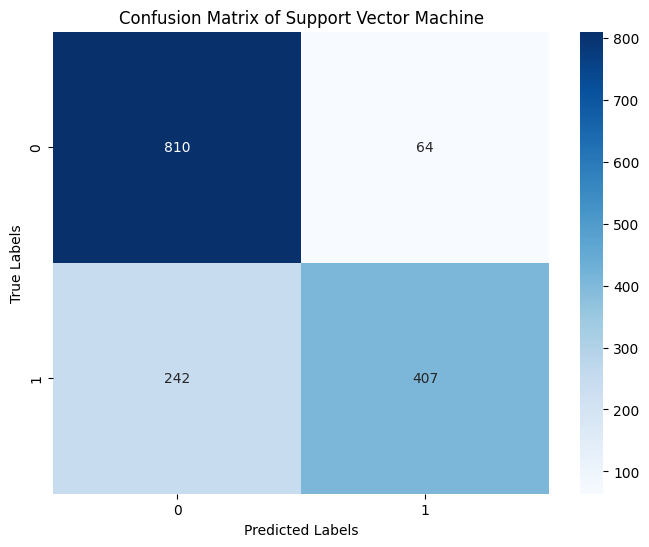

In [ ]:
# Creating a confusion matrix for Support Vector Machine
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Support Vector Machine')
plt.show()


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
report= classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       874
           1       0.81      0.65      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.78      0.78      1523



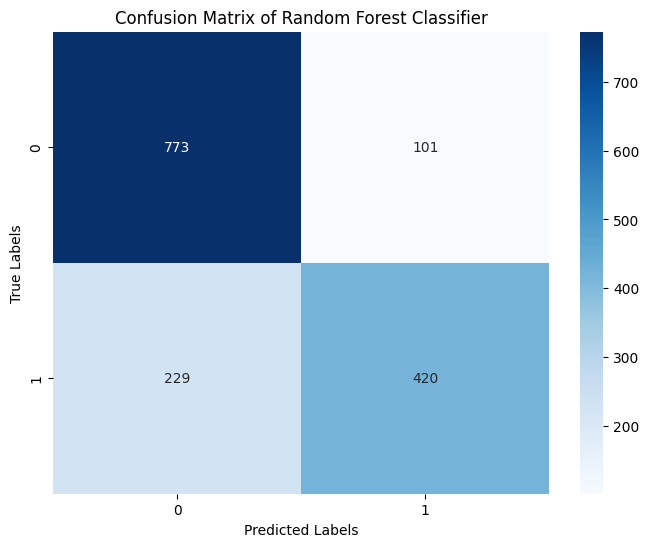

In [ ]:
# Creating a confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()
